In [1]:
from __future__ import print_function, division
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import string
import warnings
import re


In [2]:
df = pd.read_csv("test_data.csv")
df.head()

,code,x,y
0,7B22eXm7dO6,49.860269,75.403216
1,sb$Tb0NdrJ2,-36.011083,11.730664
2,RE3h5#ym<d9,-17.367508,96.169508
3,Dkh;g>mX.Ik,26.945207,65.115143
4,uw7X6u9$vG.,-12.547311,74.810954


In [3]:
df.shape

(1000000, 3)

In [4]:
df.isnull().any().any()

False

In [5]:

test_point = df.iloc[0,0]
word1 = " ".join(re.findall("[a-zA-Z]+", test_point))
word1

'B eXm dO'

In [6]:
def clean(point):
    modified_point = " ".join(re.findall("[a-zA-Z]+", point)).upper()[0]
    return modified_point

In [7]:
df["Alphabet"] = df["code"].apply(clean)

In [8]:
df.head(5)

,code,x,y,Alphabet
0,7B22eXm7dO6,49.860269,75.403216,B
1,sb$Tb0NdrJ2,-36.011083,11.730664,S
2,RE3h5#ym<d9,-17.367508,96.169508,R
3,Dkh;g>mX.Ik,26.945207,65.115143,D
4,uw7X6u9$vG.,-12.547311,74.810954,U


In [9]:
a = df.groupby("Alphabet")["Alphabet"].count()

In [10]:
df2 = pd.DataFrame()
df2["Alphabet"] = a.index
df2["Obeservations"] = a.values

In [11]:
df2.head()

,Alphabet,Obeservations
0,A,38234
1,B,38405
2,C,38327
3,D,38309
4,E,38547


In [28]:
def calculate_slope(df,i):
    data = df[df["Alphabet"] == i]
    x = data["x"].values.reshape(-1,1)
    y = data["y"].values.reshape(-1,1)
    b = LinearRegression().fit(x,y).coef_[0][0]
    return b

In [29]:
slope = [calculate_slope(df,i) for i in string.ascii_uppercase]
df2["Slope"] = slope
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [17]:
df2.head()

,Alphabet,Obeservations,Slope
0,A,38234,0.000431
1,B,38405,0.000891
2,C,38327,0.007697
3,D,38309,-0.002585
4,E,38547,-0.006771


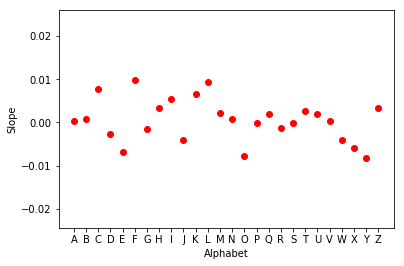

In [39]:
plt.scatter(df2["Alphabet"],df2["Slope"],color = "red")
plt.xlabel("Alphabet")
plt.ylabel("Slope")
plt.show()
